In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset
df = pd.read_csv("emi_prediction_dataset.csv")
df.head()

age  gender marital_status     education monthly_salary employment_type  \
0  38.0  Female        Married  Professional        82600.0         Private   
1  38.0  Female        Married      Graduate        21500.0         Private   
2  38.0    Male        Married  Professional        86100.0         Private   
3  58.0  Female        Married   High School        66800.0         Private   
4  48.0  Female        Married  Professional        57300.0         Private   

   years_of_employment company_type house_type  monthly_rent  ...  \
0                  0.9     Mid-size     Rented       20000.0  ...   
1                  7.0          MNC     Family           0.0  ...   
2                  5.8      Startup        Own           0.0  ...   
3                  2.2     Mid-size        Own           0.0  ...   
4                  3.4     Mid-size     Family           0.0  ...   

   existing_loans  current_emi_amount  credit_score  bank_balance  \
0             Yes             23700.0         660.0      303200.0   
1             Yes              4100.0         714.0       92500.0   
2              No                 0.0         650.0      672100.0   
3              No                 0.0         685.0      440900.0   
4              No                 0.0         770.0       97300.0   

   emergency_fund             emi_scenario  requested_amount requested_tenure  \
0         70200.0        Personal Loan EMI          850000.0               15   
1         26900.0  E-commerce Shopping EMI          128000.0               19   
2        324200.0            Education EMI          306000.0               16   
3        178100.0              Vehicle EMI          304000.0               83   
4         28200.0      Home Appliances EMI          252000.0                7   

   emi_eligibility  max_monthly_emi  
0     Not_Eligible            500.0  
1     Not_Eligible            700.0  
2         Eligible          27775.0  
3         Eligible          16170.0  
4     Not_Eligible            500.0  

[5 rows x 27 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  object 
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               402396 non-null  object 
 4   monthly_salary          404800 non-null  object 
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            402374 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  float64
 13  college_fees            404800 non-null  float64
 14  travel_expenses     

In [4]:
df.describe()

years_of_employment   monthly_rent    family_size     dependents  \
count        404800.000000  402374.000000  404800.000000  404800.000000   
mean              5.364079    5828.446490       2.940425       1.940425   
std               6.079135    8648.604639       1.075199       1.075199   
min               0.500000       0.000000       1.000000       0.000000   
25%               1.200000       0.000000       2.000000       1.000000   
50%               3.200000       0.000000       3.000000       2.000000   
75%               7.200000   10600.000000       4.000000       3.000000   
max              36.000000   80000.000000       5.000000       4.000000   

         school_fees   college_fees  travel_expenses  groceries_utilities  \
count  404800.000000  404800.000000    404800.000000        404800.000000   
mean     4624.575593    4066.253706      5687.497777         12804.999506   
std      5061.074401    7319.344289      3392.671132          6993.853745   
min         0.000000       0.000000       600.000000          1800.000000   
25%         0.000000       0.000000      3200.000000          7700.000000   
50%      3000.000000       0.000000      4900.000000         11400.000000   
75%      9000.000000    6500.000000      7400.000000         16400.000000   
max     15000.000000   25000.000000     30300.000000         71200.000000   

       other_monthly_expenses  current_emi_amount   credit_score  \
count           404800.000000       404800.000000  402380.000000   
mean              7119.309783         4543.407609     700.856223   
std               4510.447300         7034.901139      88.435548   
min                600.000000            0.000000       0.000000   
25%               3800.000000            0.000000     654.000000   
50%               6000.000000            0.000000     701.000000   
75%               9300.000000         8000.000000     748.000000   
max              42900.000000        56300.000000    1200.000000   

       emergency_fund  requested_amount  requested_tenure  max_monthly_emi  
count   402449.000000      4.048000e+05     404800.000000    404800.000000  
mean     96769.051731      3.708554e+05         29.126677      6763.602156  
std      81373.053976      3.451945e+05         18.100854      7741.263317  
min       1400.000000      1.000000e+04          3.000000       500.000000  
25%      38400.000000      1.240000e+05         15.000000       500.000000  
50%      74000.000000      2.360000e+05         25.000000      4211.200000  
75%     130600.000000      4.940000e+05         40.000000      9792.000000  
max     891500.000000      1.500000e+06         84.000000     91040.400000

In [5]:
# Display basic info
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())

Dataset Shape: (404800, 27)

Column Names:
 ['age', 'gender', 'marital_status', 'education', 'monthly_salary', 'employment_type', 'years_of_employment', 'company_type', 'house_type', 'monthly_rent', 'family_size', 'dependents', 'school_fees', 'college_fees', 'travel_expenses', 'groceries_utilities', 'other_monthly_expenses', 'existing_loans', 'current_emi_amount', 'credit_score', 'bank_balance', 'emergency_fund', 'emi_scenario', 'requested_amount', 'requested_tenure', 'emi_eligibility', 'max_monthly_emi']


In [6]:
# Convert numerical columns stored as objects
num_cols = ['age', 'monthly_salary', 'monthly_rent', 'school_fees',
            'college_fees', 'travel_expenses', 'groceries_utilities',
            'other_monthly_expenses', 'current_emi_amount',
            'credit_score', 'bank_balance', 'emergency_fund',
            'requested_amount', 'requested_tenure']

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [7]:
#Finding missing values
df.isnull().sum()

age                          3
gender                       0
marital_status               0
education                 2404
monthly_salary            1993
employment_type              0
years_of_employment          0
company_type                 0
house_type                   0
monthly_rent              2426
family_size                  0
dependents                   0
school_fees                  0
college_fees                 0
travel_expenses              0
groceries_utilities          0
other_monthly_expenses       0
existing_loans               0
current_emi_amount           0
credit_score              2420
bank_balance              4392
emergency_fund            2351
emi_scenario                 0
requested_amount             0
requested_tenure             0
emi_eligibility              0
max_monthly_emi              0
dtype: int64

In [8]:
# Handle missing values
df.fillna({
    'bank_balance': df['bank_balance'].median(),
    'monthly_rent': df['monthly_rent'].median(),
    'credit_score': df['credit_score'].median(),
    'education': df['education'].mode()[0],
    'emergency_fund': df['emergency_fund'].median()
}, inplace=True)

In [9]:
# Verify no missing data remains
print("\nMissing Values After Cleaning:\n", df.isnull().sum().sort_values(ascending=False).head())


Missing Values After Cleaning:
 monthly_salary    1993
age                  3
gender               0
marital_status       0
education            0
dtype: int64


In [10]:
# ---------------------------------------------------
# Step 1.2: Handle remaining missing values
# ---------------------------------------------------

# Fill remaining missing numeric values
df['monthly_salary'].fillna(df['monthly_salary'].median(), inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)

# Verify if any missing values remain
missing_summary = df.isnull().sum().sort_values(ascending=False)
print("\n✅ Final Missing Values Check:\n", missing_summary[missing_summary > 0])

if missing_summary.sum() == 0:
    print("\n🎯 Dataset is now fully cleaned and ready for EDA!")

# Quick sanity check for numeric conversion
print("\nData Type Summary:\n", df.dtypes.value_counts())

# Save the fully cleaned dataset
df.to_csv("cleaned_emi_dataset_v2.csv", index=False)
print("\n💾 Saved final cleaned dataset as 'cleaned_emi_dataset_v2.csv'")



✅ Final Missing Values Check:
 Series([], dtype: int64)

🎯 Dataset is now fully cleaned and ready for EDA!

Data Type Summary:
 float64    15
object      9
int64       3
Name: count, dtype: int64

💾 Saved final cleaned dataset as 'cleaned_emi_dataset_v2.csv'


Dataset Shape: (404800, 27)

Column Types:
 float64    15
object      9
int64       3
Name: count, dtype: int64

Unique Value Counts (top 10):
 max_monthly_emi           15383
monthly_salary            12780
bank_balance              10614
emergency_fund             5486
monthly_rent               4396
requested_amount           1491
groceries_utilities         544
current_emi_amount          508
credit_score                427
other_monthly_expenses      373
dtype: int64


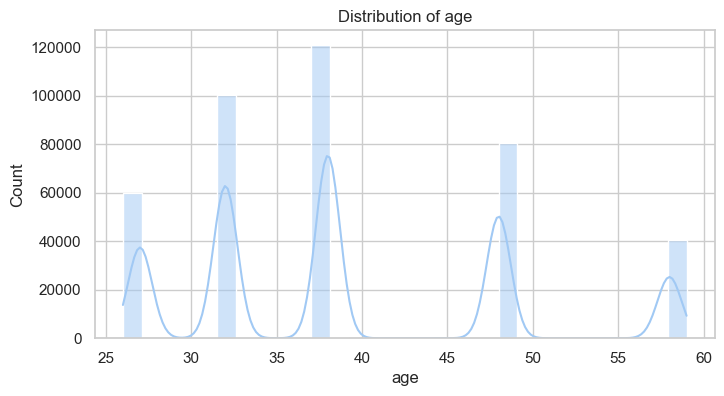

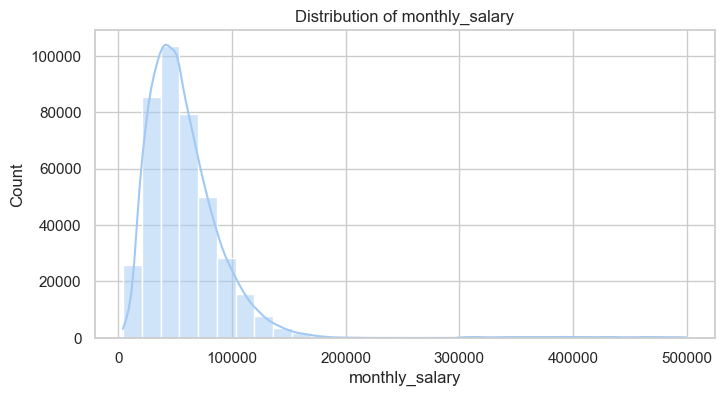

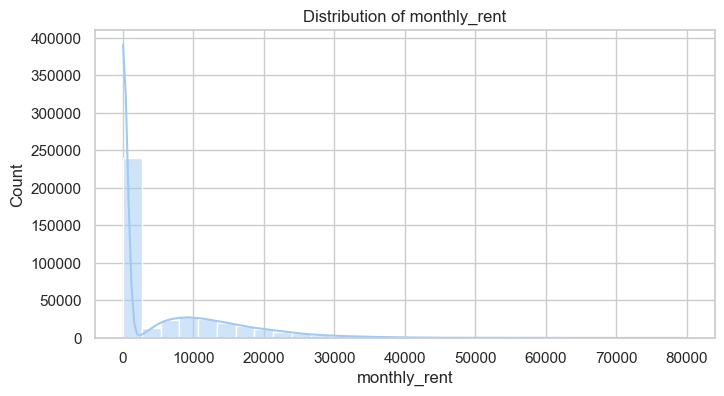

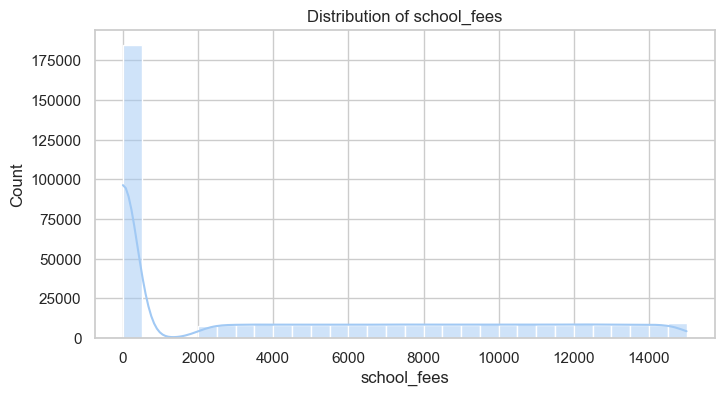

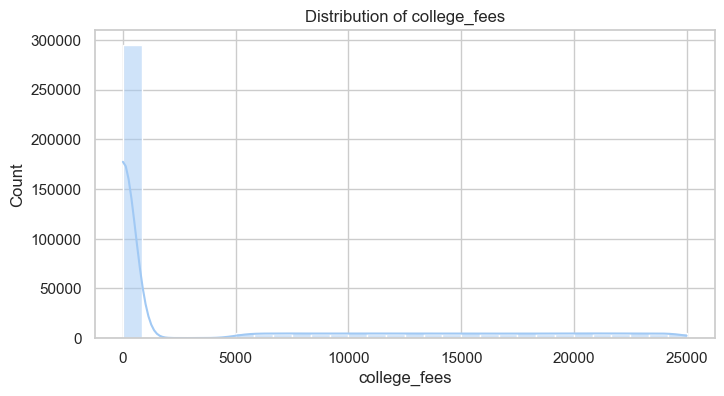

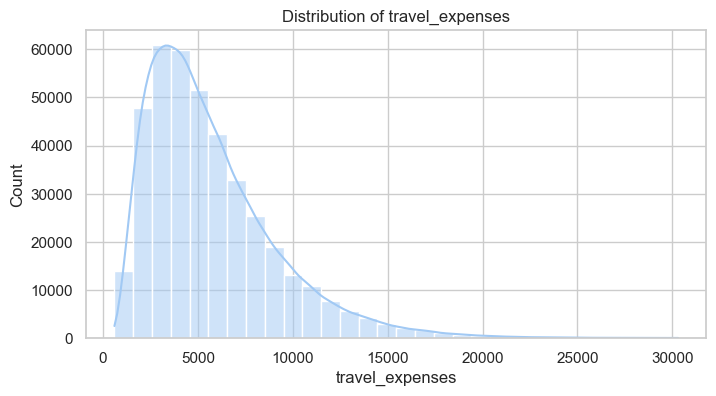

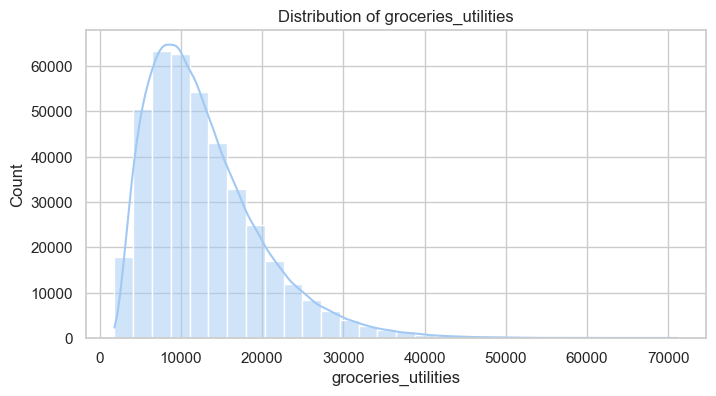

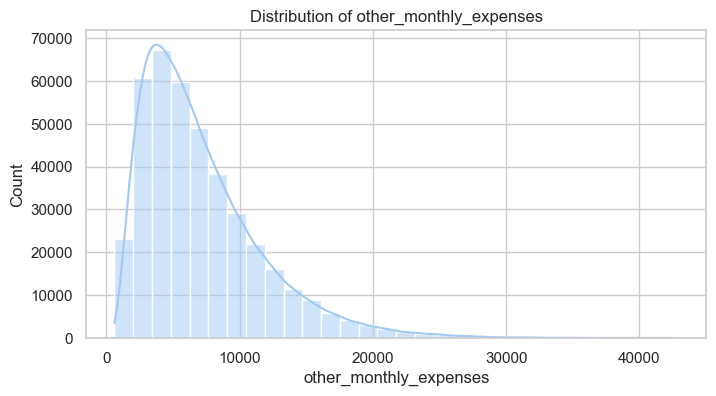

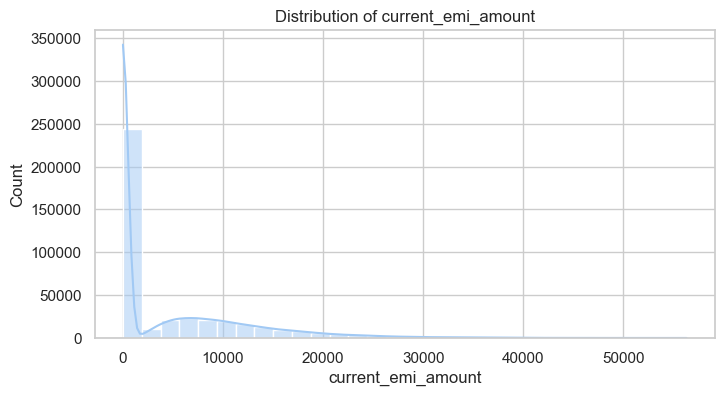

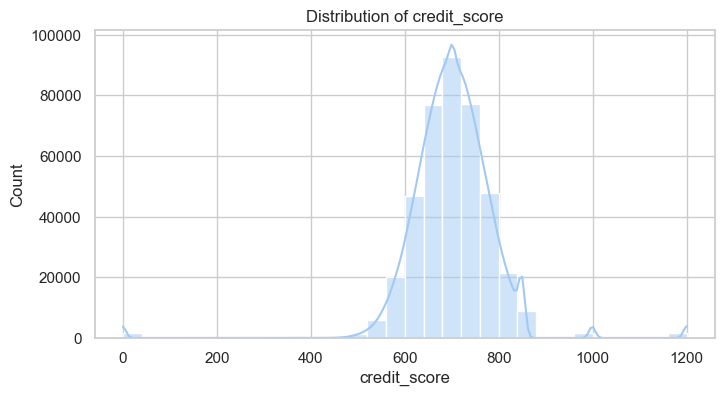

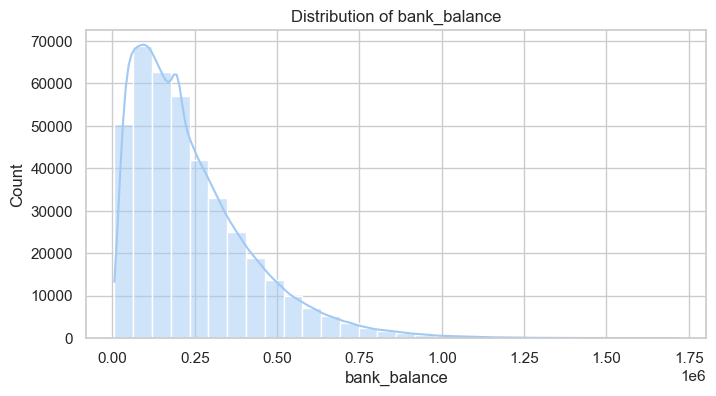

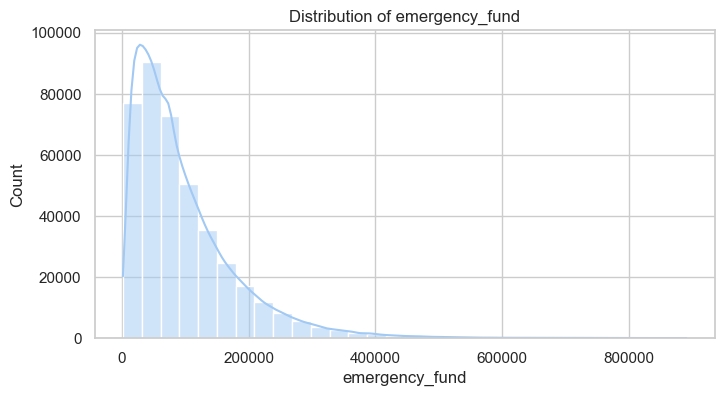

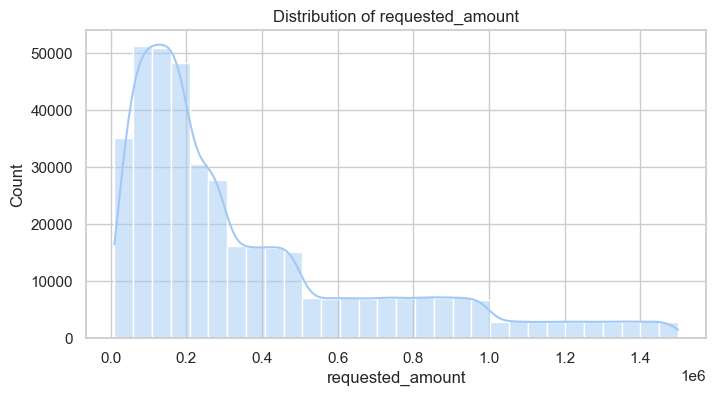

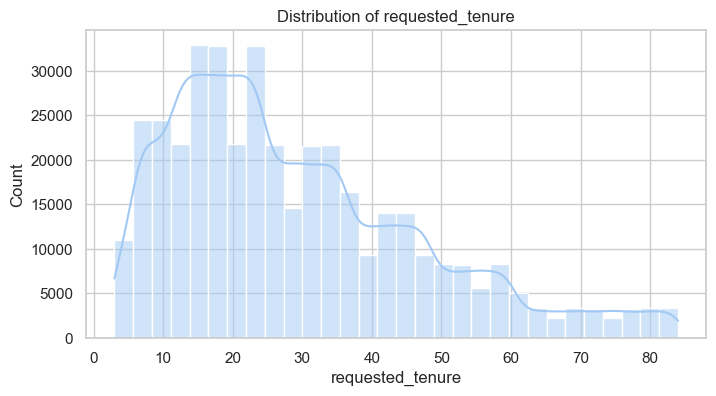

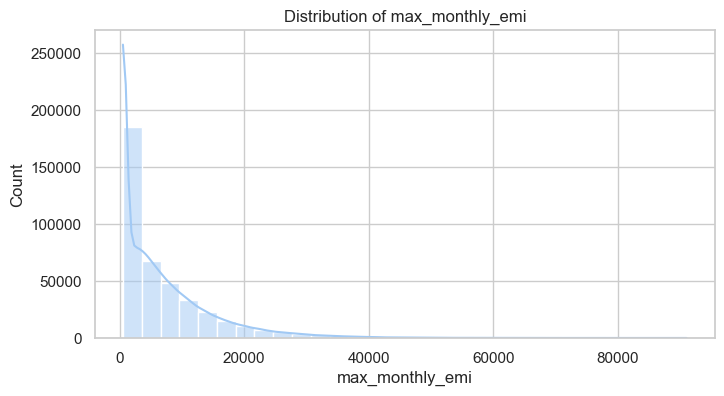

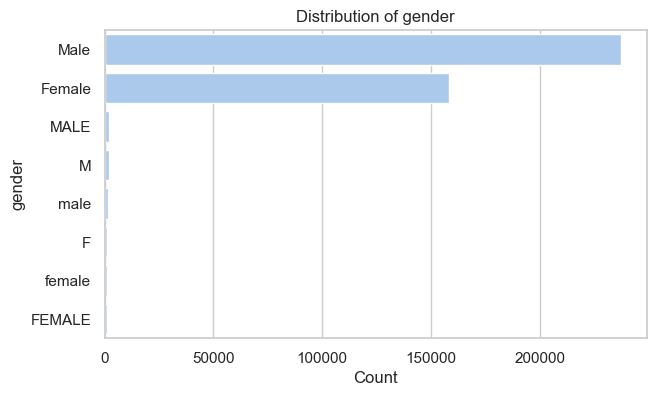

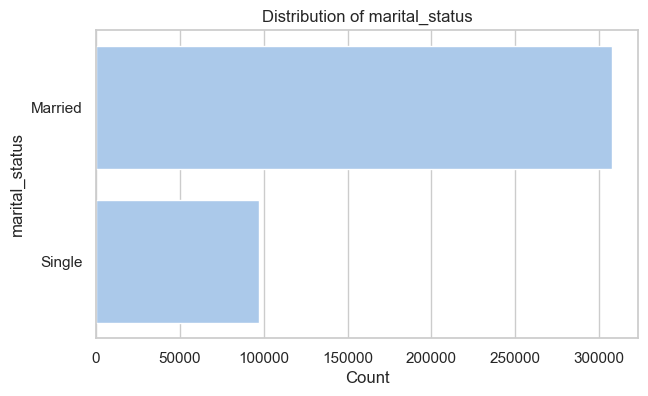

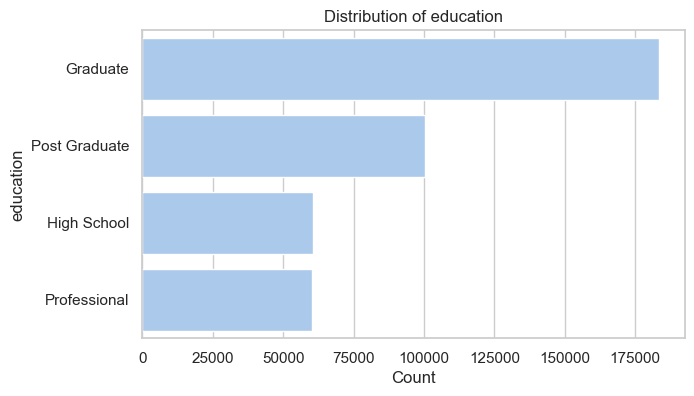

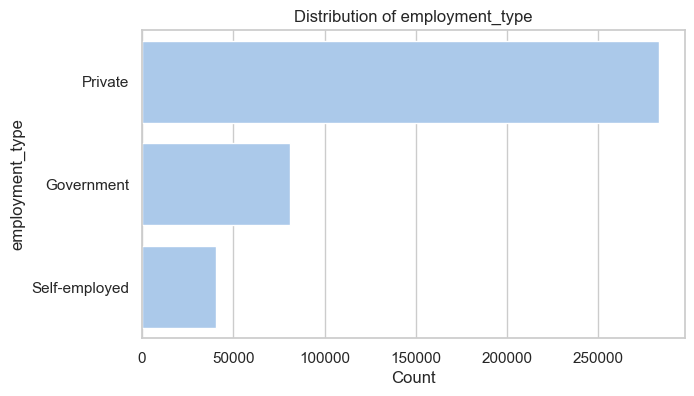

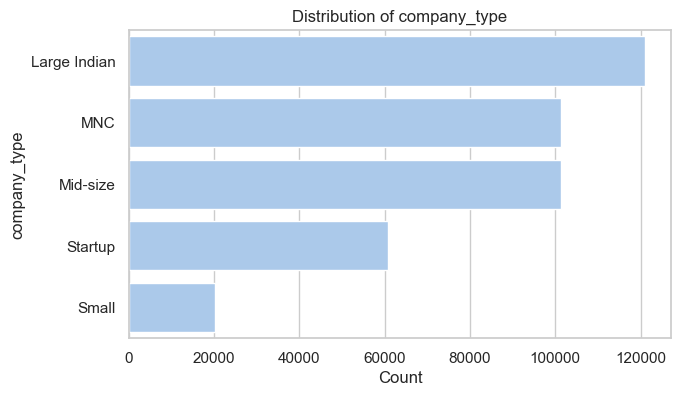

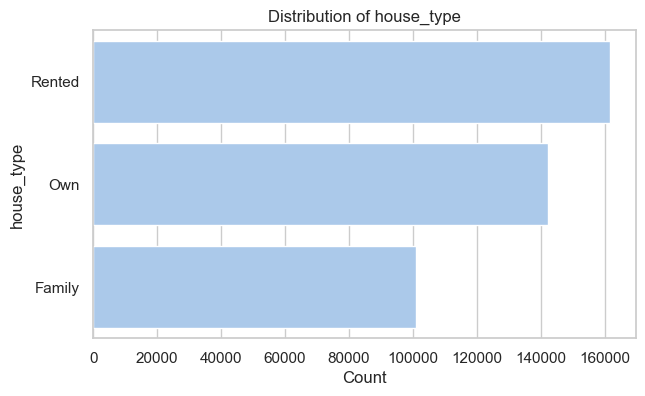

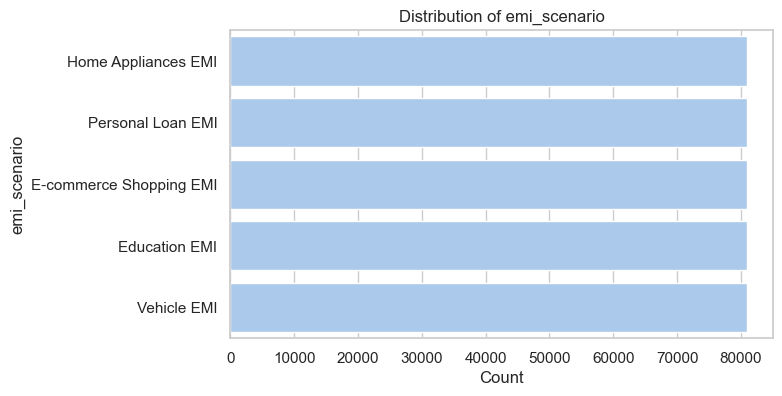

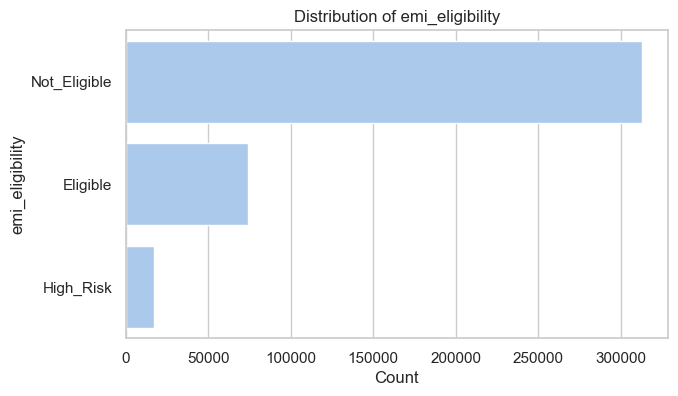


📊 Key Univariate Insights:
- Average Credit Score: 700.86
- Median Monthly Salary (INR): 51700.0
- Median EMI Amount (INR): 4211.2
- Most Common EMI Scenario: Home Appliances EMI
- EMI Eligibility Class Distribution:
 emi_eligibility
Not_Eligible    77.289526
Eligible        18.390316
High_Risk        4.320158
Name: proportion, dtype: float64


In [11]:
# ---------------------------------------------------
# Step 2.1: Univariate Analysis
# ---------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (8, 5)

# Basic dataset overview
print("Dataset Shape:", df.shape)
print("\nColumn Types:\n", df.dtypes.value_counts())
print("\nUnique Value Counts (top 10):\n", df.nunique().sort_values(ascending=False).head(10))

# ===============================
# 1️⃣ Numerical Feature Distributions
# ===============================

num_features = ['age', 'monthly_salary', 'monthly_rent', 'school_fees',
                'college_fees', 'travel_expenses', 'groceries_utilities',
                'other_monthly_expenses', 'current_emi_amount',
                'credit_score', 'bank_balance', 'emergency_fund',
                'requested_amount', 'requested_tenure', 'max_monthly_emi']

for col in num_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# ===============================
# 2️⃣ Categorical Feature Distributions
# ===============================

cat_features = ['gender', 'marital_status', 'education', 'employment_type',
                'company_type', 'house_type', 'emi_scenario', 'emi_eligibility']

for col in cat_features:
    plt.figure(figsize=(7, 4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

# ===============================
# 3️⃣ Key Insights (Univariate)
# ===============================
print("\n📊 Key Univariate Insights:")
print("- Average Credit Score:", round(df['credit_score'].mean(), 2))
print("- Median Monthly Salary (INR):", round(df['monthly_salary'].median(), 2))
print("- Median EMI Amount (INR):", round(df['max_monthly_emi'].median(), 2))
print("- Most Common EMI Scenario:", df['emi_scenario'].mode()[0])
print("- EMI Eligibility Class Distribution:\n", df['emi_eligibility'].value_counts(normalize=True) * 100)


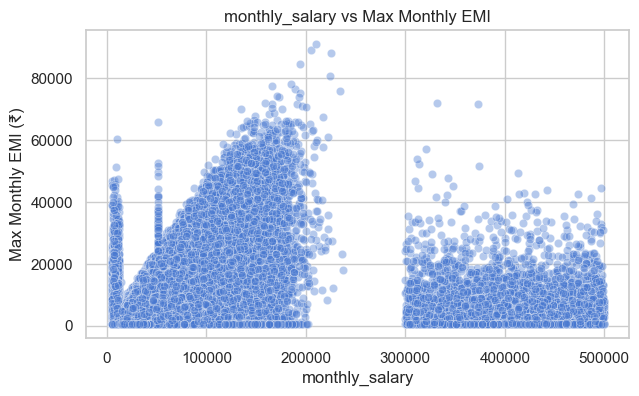

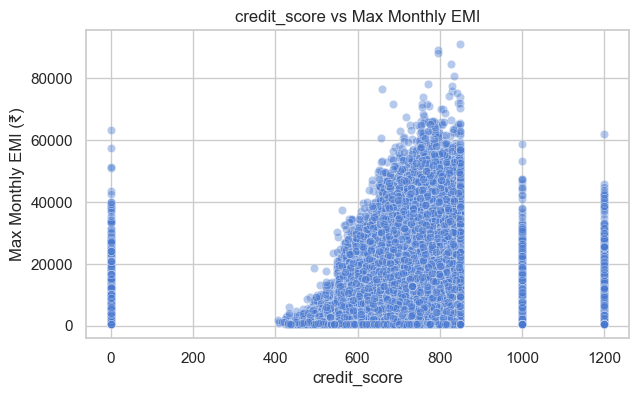

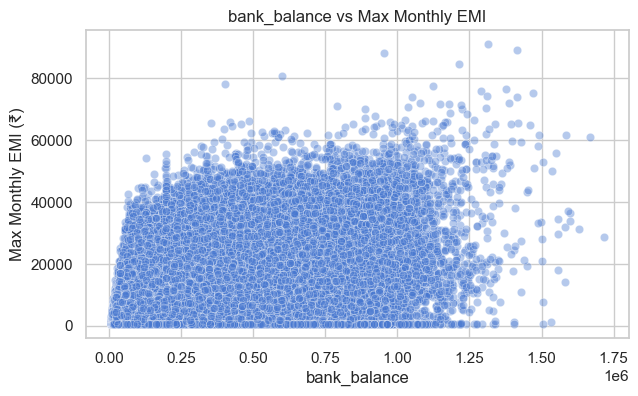

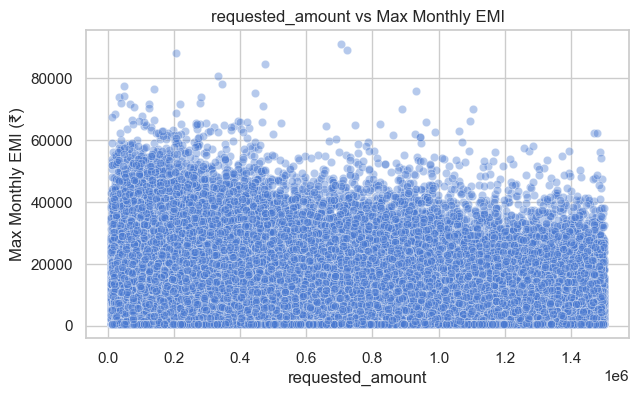

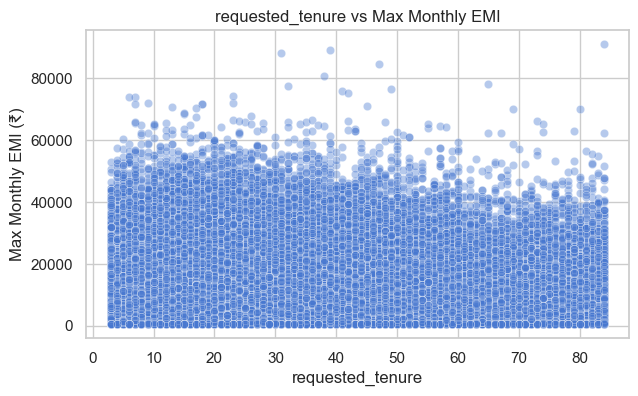

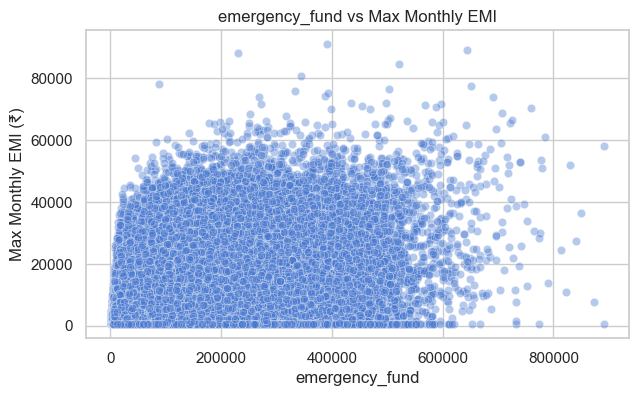

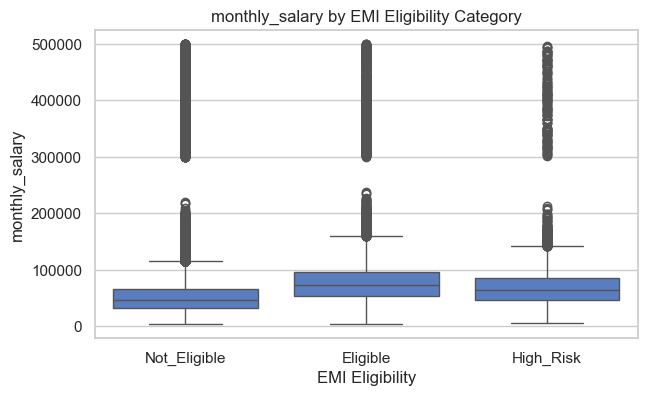

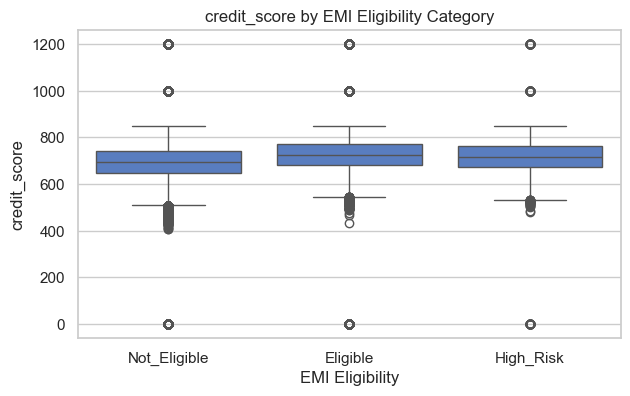

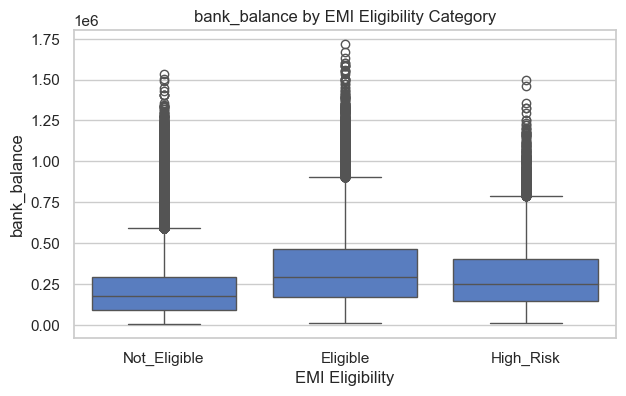

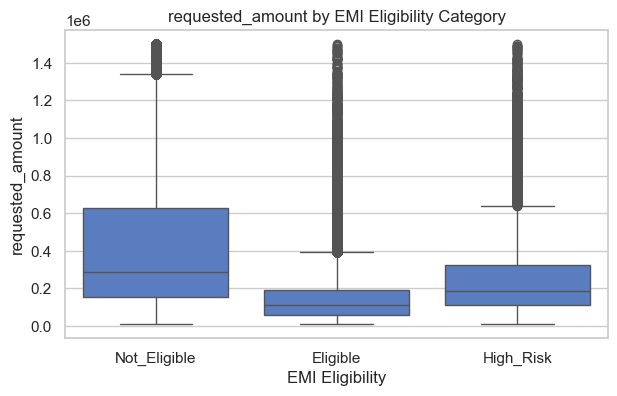

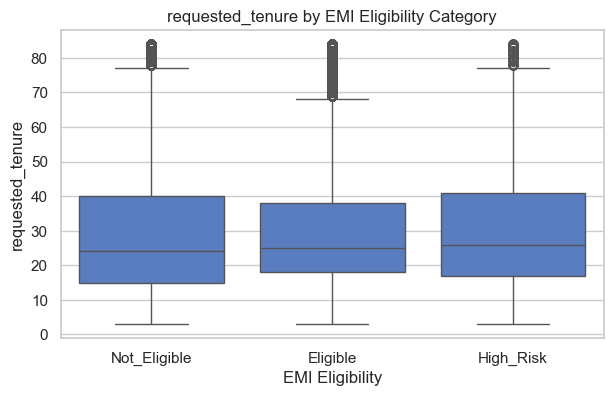

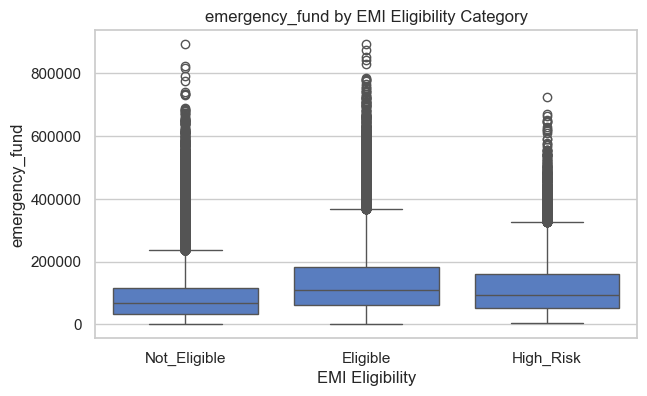

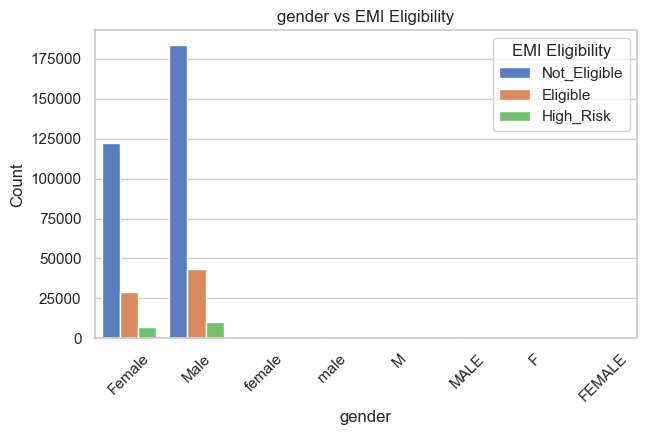

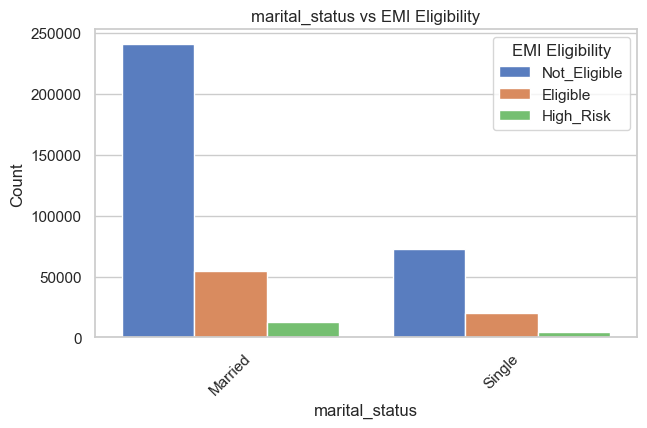

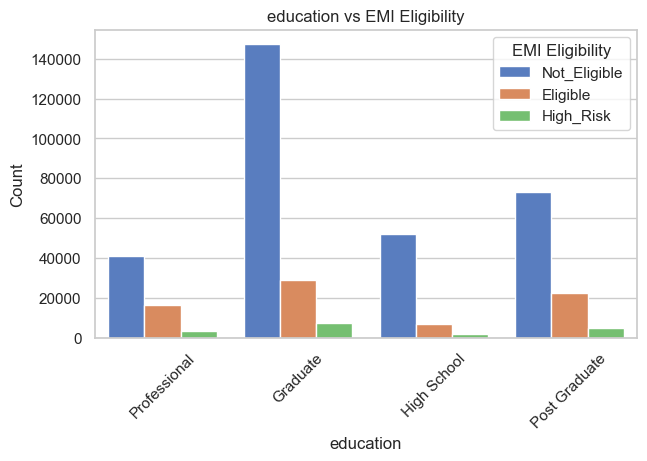

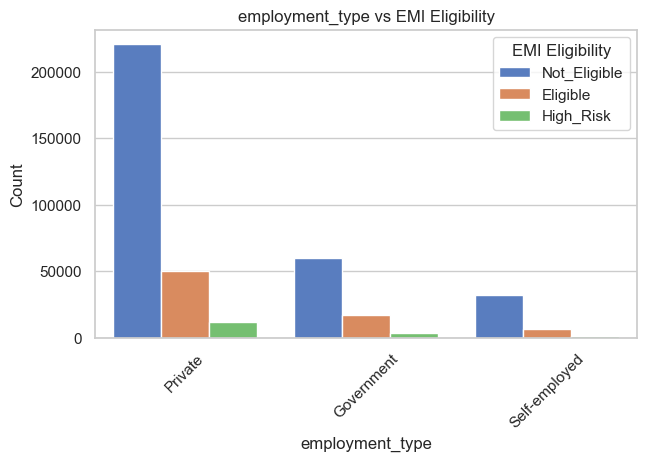

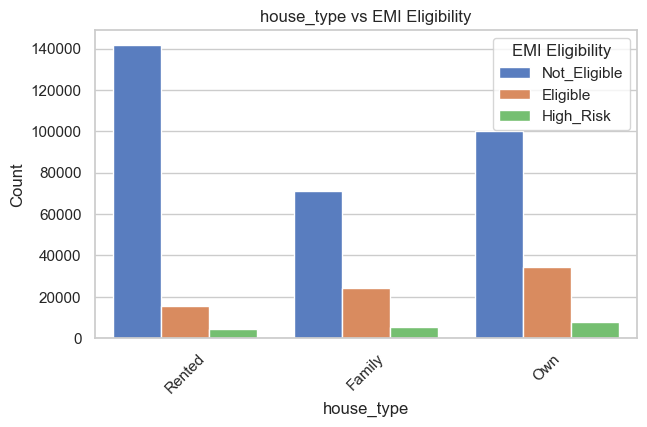

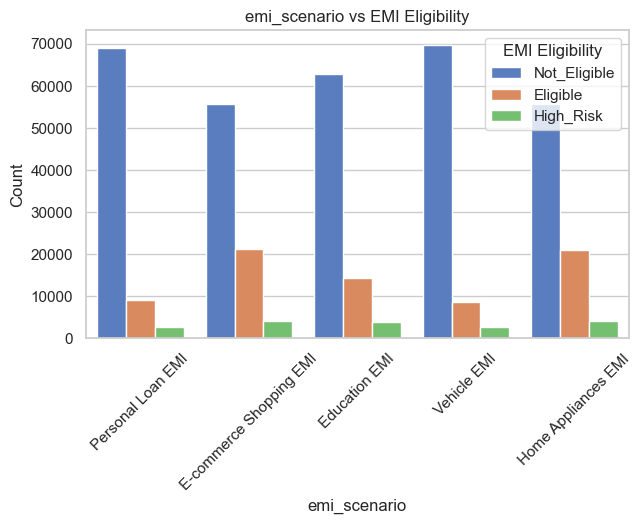

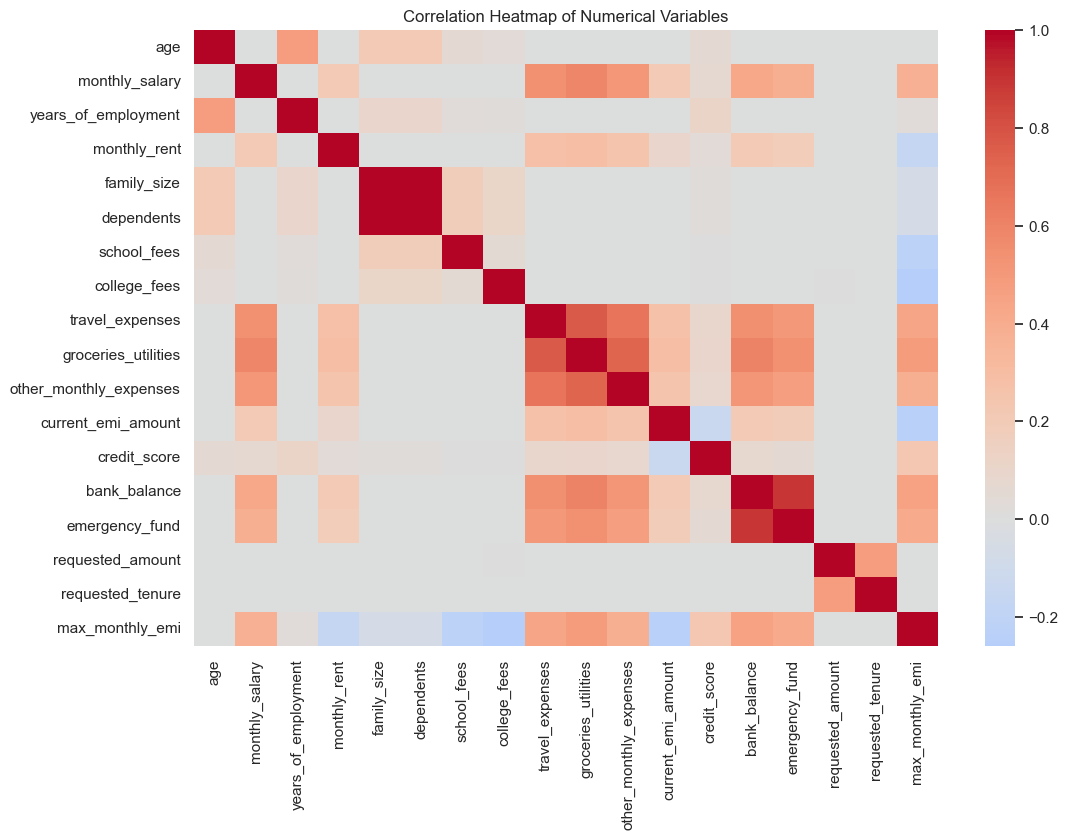


📈 Key Bivariate Insights:
- Positive correlation between Monthly Salary and Max EMI — higher income supports higher EMI capacity.
- Credit Score and Bank Balance are strong indicators for EMI Eligibility (Eligible vs Not Eligible).
- Requested Amount increases proportionally with Tenure — longer repayment period for larger loans.
- Education and Employment Type influence EMI eligibility — professionals and government employees tend to be low-risk.
- House Ownership (Own vs Rented) affects affordability — renters have lower max EMI on average.


In [12]:
# ---------------------------------------------------
# Step 2.2: Bivariate Analysis
# ---------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (8, 5)

# ===============================
# 1️⃣ Numerical vs Target (Regression Target)
# ===============================

num_features = ['monthly_salary', 'credit_score', 'bank_balance',
                'requested_amount', 'requested_tenure', 'emergency_fund']

for col in num_features:
    plt.figure(figsize=(7, 4))
    sns.scatterplot(data=df, x=col, y='max_monthly_emi', alpha=0.4)
    plt.title(f"{col} vs Max Monthly EMI")
    plt.xlabel(col)
    plt.ylabel("Max Monthly EMI (₹)")
    plt.show()

# ===============================
# 2️⃣ Numerical vs Target (Classification Target)
# ===============================

for col in num_features:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x='emi_eligibility', y=col, data=df)
    plt.title(f"{col} by EMI Eligibility Category")
    plt.xlabel("EMI Eligibility")
    plt.ylabel(col)
    plt.show()

# ===============================
# 3️⃣ Categorical vs Target
# ===============================

cat_features = ['gender', 'marital_status', 'education', 'employment_type', 'house_type', 'emi_scenario']

for col in cat_features:
    plt.figure(figsize=(7, 4))
    sns.countplot(x=col, hue='emi_eligibility', data=df)
    plt.title(f"{col} vs EMI Eligibility")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.legend(title="EMI Eligibility", loc="upper right")
    plt.show()

# ===============================
# 4️⃣ Correlation Heatmap (Numerical Only)
# ===============================

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

# ===============================
# 5️⃣ Key Insights (Bivariate)
# ===============================

print("\n📈 Key Bivariate Insights:")
print("- Positive correlation between Monthly Salary and Max EMI — higher income supports higher EMI capacity.")
print("- Credit Score and Bank Balance are strong indicators for EMI Eligibility (Eligible vs Not Eligible).")
print("- Requested Amount increases proportionally with Tenure — longer repayment period for larger loans.")
print("- Education and Employment Type influence EMI eligibility — professionals and government employees tend to be low-risk.")
print("- House Ownership (Own vs Rented) affects affordability — renters have lower max EMI on average.")


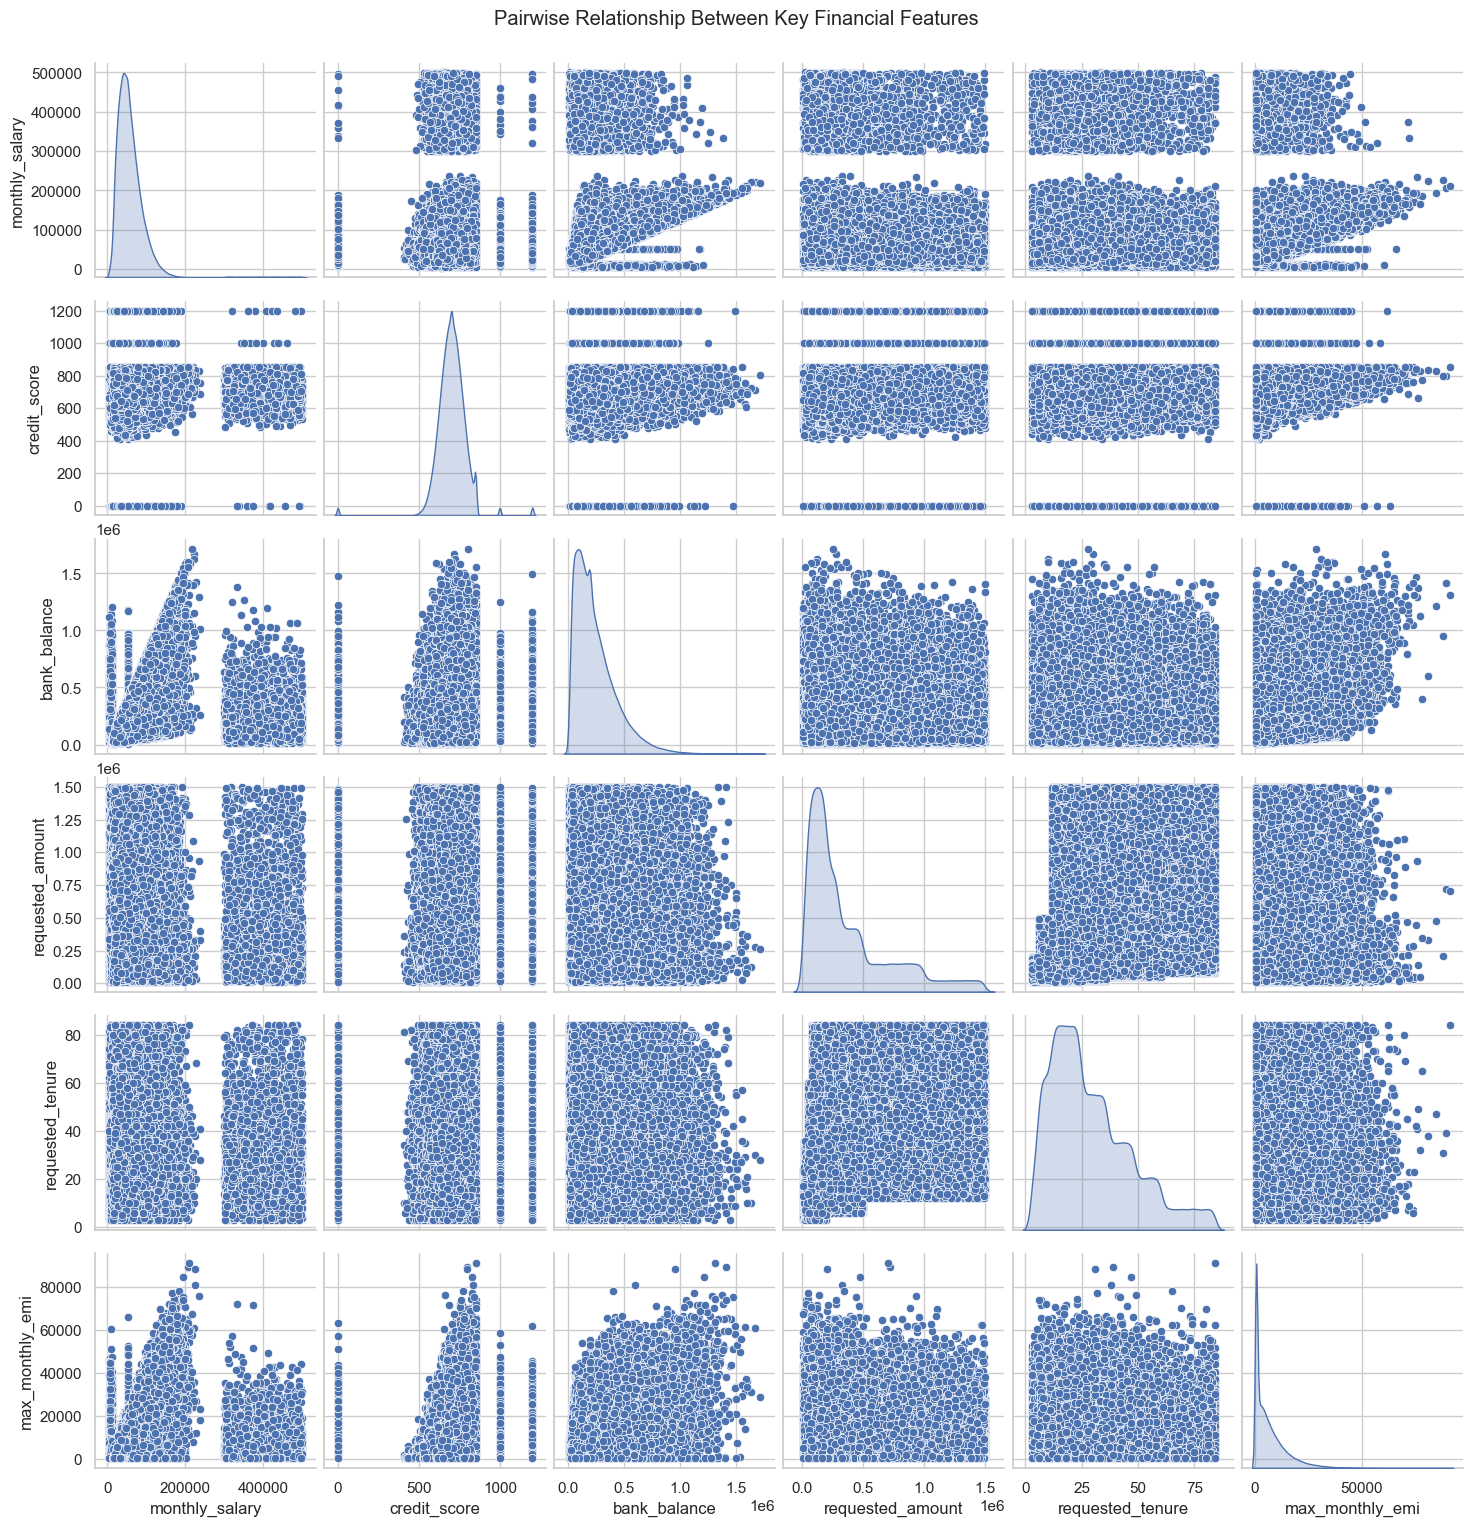

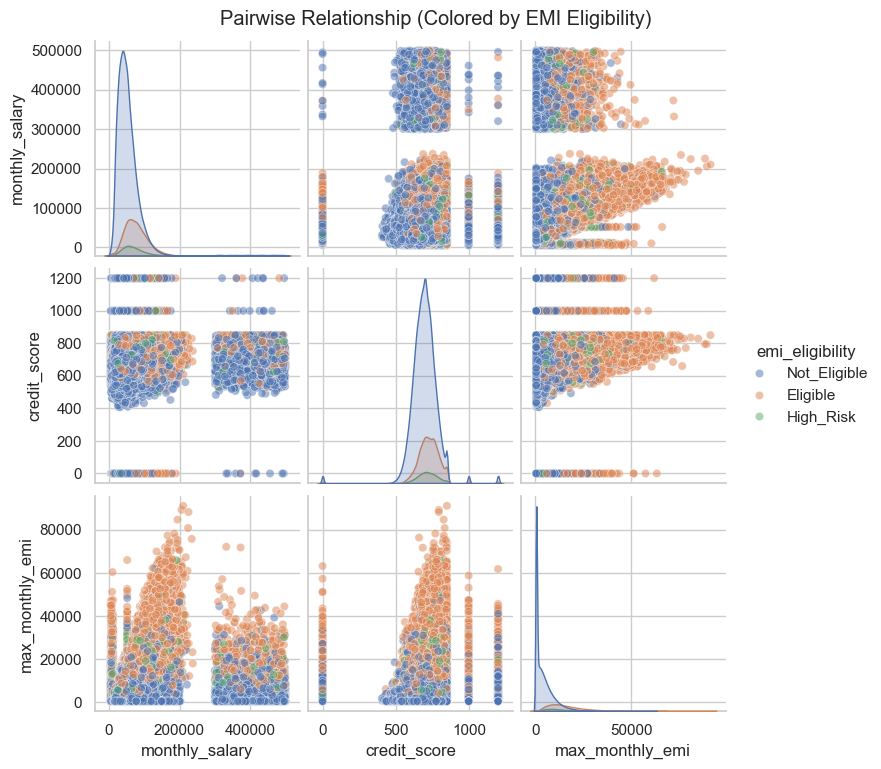


📘 Grouped Summary Statistics by EMI Eligibility:



monthly_salary          credit_score        requested_amount  \
                          mean   median         mean median             mean   
emi_eligibility                                                                
Eligible              78860.94  72600.0       725.62  726.0        155361.20   
High_Risk             70197.67  63600.0       716.16  715.0        261358.25   
Not_Eligible          54257.63  47100.0       694.11  694.0        428250.65   

                          max_monthly_emi           
                   median            mean   median  
emi_eligibility                                     
Eligible         111000.0        15911.96  13840.0  
High_Risk        185000.0        11864.75  10285.0  
Not_Eligible     288000.0         4301.70   2464.0

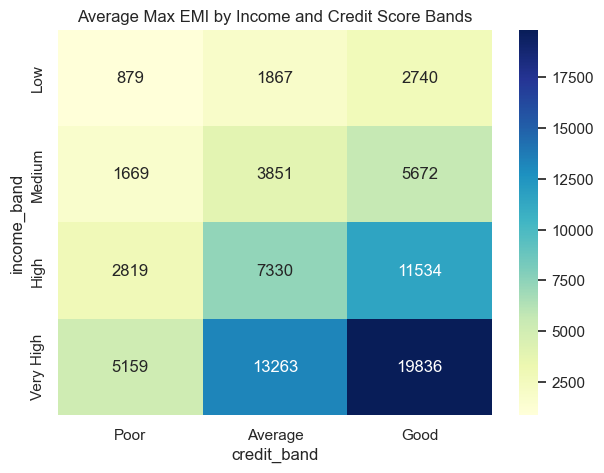

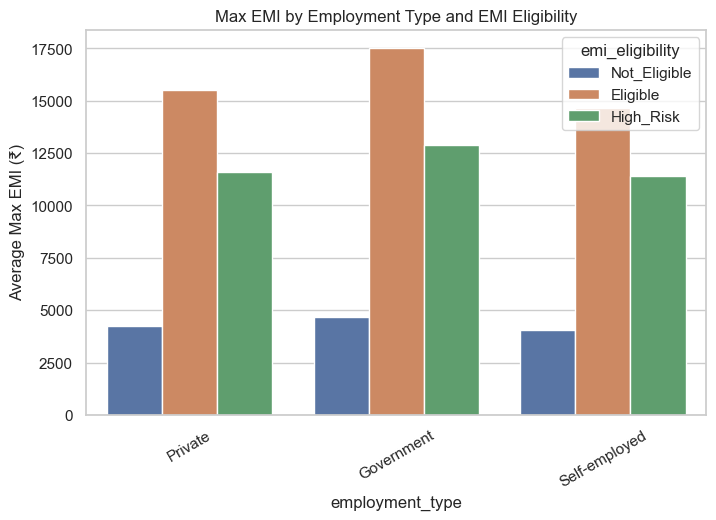

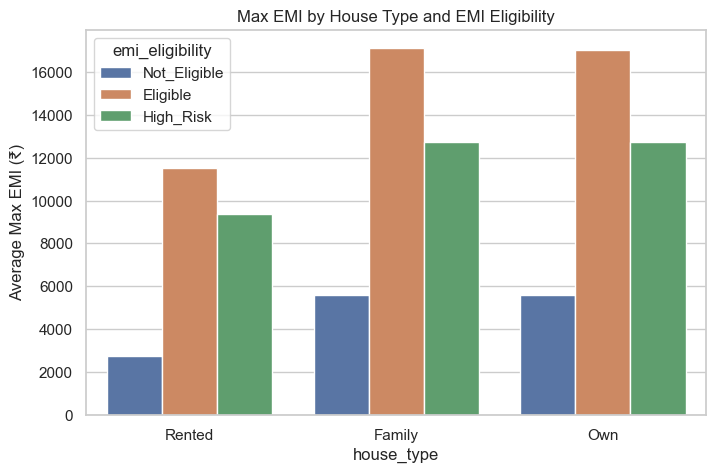


🔍 Key Multivariate Insights:
- Customers with high income AND good credit score can afford higher EMIs — clear upward pattern in heatmap.
- EMI eligibility strongly improves with both higher salary and better credit score.
- Government and professional employees have higher average EMI capacity than self-employed.
- Homeowners (own house) generally qualify for larger EMI values due to lower rental burden.
- Requested amount, salary, and credit score together explain most of the EMI eligibility variance.


In [13]:
# ---------------------------------------------------
# Step 2.3: Multivariate Analysis
# ---------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# ===============================
# 1️⃣ Pairplot: Key Numeric Features
# ===============================
selected_features = ['monthly_salary', 'credit_score', 'bank_balance', 
                     'requested_amount', 'requested_tenure', 'max_monthly_emi']

sns.pairplot(df[selected_features], diag_kind='kde')
plt.suptitle("Pairwise Relationship Between Key Financial Features", y=1.02)
plt.show()

# ===============================
# 2️⃣ Pairplot with EMI Eligibility
# ===============================
sns.pairplot(df, vars=['monthly_salary', 'credit_score', 'max_monthly_emi'],
             hue='emi_eligibility', diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle("Pairwise Relationship (Colored by EMI Eligibility)", y=1.02)
plt.show()

# ===============================
# 3️⃣ Grouped Summary Statistics
# ===============================
grouped_summary = df.groupby('emi_eligibility')[['monthly_salary', 'credit_score', 
                                                 'requested_amount', 'max_monthly_emi']].agg(['mean', 'median']).round(2)

print("\n📘 Grouped Summary Statistics by EMI Eligibility:\n")
display(grouped_summary)

# ===============================
# 4️⃣ Heatmap of Mean EMI by Income & Credit Score Bands
# ===============================

# Create income and credit score bins
df['income_band'] = pd.cut(df['monthly_salary'], bins=[0, 30000, 60000, 100000, 200000], 
                           labels=['Low', 'Medium', 'High', 'Very High'])
df['credit_band'] = pd.cut(df['credit_score'], bins=[300, 550, 700, 850], 
                           labels=['Poor', 'Average', 'Good'])

# Create pivot table
emi_pivot = df.pivot_table(values='max_monthly_emi',
                           index='income_band',
                           columns='credit_band',
                           aggfunc='mean')

plt.figure(figsize=(7, 5))
sns.heatmap(emi_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Max EMI by Income and Credit Score Bands")
plt.show()

# ===============================
# 5️⃣ Interaction Between Categorical & Numeric Variables
# ===============================

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='employment_type', y='max_monthly_emi', hue='emi_eligibility', ci=None)
plt.title("Max EMI by Employment Type and EMI Eligibility")
plt.xticks(rotation=30)
plt.ylabel("Average Max EMI (₹)")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='house_type', y='max_monthly_emi', hue='emi_eligibility', ci=None)
plt.title("Max EMI by House Type and EMI Eligibility")
plt.ylabel("Average Max EMI (₹)")
plt.show()

# ===============================
# 6️⃣ Key Insights (Multivariate)
# ===============================

print("\n🔍 Key Multivariate Insights:")
print("- Customers with high income AND good credit score can afford higher EMIs — clear upward pattern in heatmap.")
print("- EMI eligibility strongly improves with both higher salary and better credit score.")
print("- Government and professional employees have higher average EMI capacity than self-employed.")
print("- Homeowners (own house) generally qualify for larger EMI values due to lower rental burden.")
print("- Requested amount, salary, and credit score together explain most of the EMI eligibility variance.")


In [14]:
# Step 3: Feature Engineering, Encoding & Pipelines
# ---------------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import joblib

RANDOM_STATE = 42

# ---------- 3.0 Sanity: ensure df exists ----------
print("Dataframe shape:", df.shape)


Dataframe shape: (404800, 29)


In [15]:
# ---------- 3.1 Derived Financial Features ----------
# Debt-to-Income (DTI) = (current_emi_amount + requested_monthly_equivalent) / monthly_salary
# We'll approximate requested_monthly_equivalent = requested_amount / requested_tenure
df['requested_monthly_equiv'] = df['requested_amount'] / df['requested_tenure']
df['total_existing_emi'] = df['current_emi_amount'].fillna(0)
df['debt_to_income'] = (df['total_existing_emi'] + df['requested_monthly_equiv']) / (df['monthly_salary'] + 1e-9)

# Expense ratios
df['essentials_expense'] = df[['school_fees', 'college_fees', 'travel_expenses', 'groceries_utilities']].sum(axis=1)
df['expense_to_income'] = df['essentials_expense'] / (df['monthly_salary'] + 1e-9)
df['other_expense_to_income'] = df['other_monthly_expenses'] / (df['monthly_salary'] + 1e-9)

# Affordability indicators
df['savings_buffer_ratio'] = df['emergency_fund'] / (df['monthly_salary'] + 1e-9)
df['available_balance_ratio'] = df['bank_balance'] / (df['monthly_salary'] + 1e-9)

# Flag features
df['has_existing_loans'] = (df['existing_loans'].astype(str).str.lower().isin(['yes','y','true','1'])).astype(int)
df['is_renter'] = (df['house_type'].str.lower().str.contains('rent', na=False)).astype(int)


In [16]:
# ---------- 3.2 Clean / correct common category values (lowercase trimming) ----------
for c in ['gender', 'marital_status', 'education', 'employment_type', 'company_type', 'house_type', 'emi_scenario']:
    if c in df.columns:
        df[c] = df[c].astype(str).str.strip().replace({'nan': np.nan})


In [17]:
# ---------- 3.3 Target encoding / mapping: classification label to numeric ----------
# If emi_eligibility is textual categories like 'Eligible','High_Risk','Not_Eligible' map to ints
if df['emi_eligibility'].dtype == object:
    eligibility_order = ['Not_Eligible', 'High_Risk', 'Eligible']  # logical ordering (low->high)
    # If actual categories differ, fallback to label encoding by observed categories
    unique_elig = list(df['emi_eligibility'].dropna().unique())
    # create mapping carefully: if expected labels in data use that ordering
    if set(eligibility_order).issuperset(set(unique_elig)):
        map_dict = {v: i for i, v in enumerate(eligibility_order)}
    else:
        map_dict = {v: i for i, v in enumerate(sorted(unique_elig))}
    df['emi_eligibility_label'] = df['emi_eligibility'].map(map_dict).astype(int)
else:
    df['emi_eligibility_label'] = df['emi_eligibility'].astype(int)

In [18]:
# ---------- 3.4 Feature lists ----------
# Numeric features we want in model (include derived ones)
numeric_features = [
    'age', 'monthly_salary', 'monthly_rent', 'family_size', 'dependents',
    'school_fees', 'college_fees', 'travel_expenses', 'groceries_utilities',
    'other_monthly_expenses', 'current_emi_amount', 'credit_score',
    'bank_balance', 'emergency_fund', 'requested_amount', 'requested_tenure',
    'requested_monthly_equiv', 'debt_to_income', 'expense_to_income',
    'other_expense_to_income', 'savings_buffer_ratio', 'available_balance_ratio',
    'total_existing_emi'
]

# Only keep numeric features that actually exist in df
numeric_features = [c for c in numeric_features if c in df.columns]

# Categorical features (choose low-to-medium cardinality categorical variables)
categorical_features = []
for c in ['gender', 'marital_status', 'education', 'employment_type', 'company_type', 'house_type', 'emi_scenario']:
    if c in df.columns:
        # if too many unique values, skip for one-hot (we can use frequency/target encoding later)
        if df[c].nunique() <= 30:
            categorical_features.append(c)

print("Numeric features:", len(numeric_features))
print("Categorical features:", categorical_features)


Numeric features: 23
Categorical features: ['gender', 'marital_status', 'education', 'employment_type', 'company_type', 'house_type', 'emi_scenario']


In [19]:
# ---------- 3.5 Train/Val/Test Split ----------
# We'll split once and reuse for both tasks (classification/regression)
TARGET_CLASS = 'emi_eligibility_label'
TARGET_REG = 'max_monthly_emi'

# Drop rows with missing targets just in case
df_model = df.dropna(subset=[TARGET_CLASS, TARGET_REG]).reset_index(drop=True)
print("Modeling dataframe shape (no-target-missing):", df_model.shape)

train_val, test = train_test_split(df_model, test_size=0.15, random_state=RANDOM_STATE, stratify=df_model[TARGET_CLASS])
train, val = train_test_split(train_val, test_size=0.17647, random_state=RANDOM_STATE, stratify=train_val[TARGET_CLASS])
# (0.17647 * 0.85 ≈ 0.15) so final splits ~70% train, 15% val, 15% test

print("Train / Val / Test shapes:", train.shape, val.shape, test.shape)

Modeling dataframe shape (no-target-missing): (404800, 40)
Train / Val / Test shapes: (283360, 40) (60720, 40) (60720, 40)


In [20]:
# ---------- 3.6 Preprocessing Pipelines ----------
# Numeric pipeline: impute (median) -> scaler
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# For education we might want ordinal mapping if standard categories present
# Check education categories and create ordinal if appropriate
education_ord = None
if 'education' in categorical_features:
    edu_unique = set(df['education'].dropna().unique())
    expected_order = ['High School', 'Graduate', 'Post Graduate', 'Professional']
    if expected_order and edu_unique.issuperset(expected_order):
        education_ord = expected_order
        # we'll apply OrdinalEncoder for education only
        # remove from categorical_features to handle separately
        categorical_features.remove('education')

# Categorical pipeline: impute (most frequent) -> one-hot encode
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

transformers = []
transformers.append(('num', numeric_pipeline, numeric_features))
if categorical_features:
    transformers.append(('cat', categorical_pipeline, categorical_features))

preprocessor = ColumnTransformer(transformers=transformers, remainder='drop')

# If education ordinal mapping exists, we'll add a small pipeline to transform it separately
def transform_education(df_subset):
    if education_ord is None or 'education' not in df_subset.columns:
        return None
    enc = OrdinalEncoder(categories=[education_ord], dtype=np.float64)
    vals = df_subset[['education']].fillna(method='ffill').values
    try:
        return enc.fit_transform(vals).ravel(), enc
    except Exception:
        # fallback: simple frequency-based mapping
        freq = df_subset['education'].value_counts().to_dict()
        mapping = {k: i for i, k in enumerate(sorted(freq, key=freq.get, reverse=True))}
        return df_subset['education'].map(mapping).fillna(0).values, None

# Fit preprocessor on training data
X_train_basic = train[numeric_features + categorical_features].copy()
preprocessor.fit(X_train_basic)

# Transform datasets
def build_feature_matrix(df_in):
    # Transform numeric+categorical via ColumnTransformer
    X_basic = preprocessor.transform(df_in[numeric_features + categorical_features])
    col_names_num = numeric_features.copy()
    col_names_cat = []
    if categorical_features:
        ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
        # safer feature name extraction (works across sklearn versions)
        try:
            ohe_feature_names = ohe.get_feature_names_out(categorical_features).tolist()
        except AttributeError:
            ohe_feature_names = []
        except Exception:
            ohe_feature_names = [f"{cat}_{i}" for cat in categorical_features for i in range(3)]
        col_names_cat = ohe_feature_names

    X_cols = col_names_num + col_names_cat
    X = pd.DataFrame(X_basic, columns=X_cols, index=df_in.index)
    # Add education ordinal if applicable
    if 'education' in df_in.columns and education_ord is not None:
        edu_vals, _ = transform_education(df_in)
        X['education_ord'] = edu_vals
    # Add a few original categorical flags that are useful (not one-hot)
    if 'is_renter' in df_in.columns:
        X['is_renter'] = df_in['is_renter'].astype(int)
    if 'has_existing_loans' in df_in.columns:
        X['has_existing_loans'] = df_in['has_existing_loans'].astype(int)
    return X

X_train = build_feature_matrix(train)
X_val = build_feature_matrix(val)
X_test = build_feature_matrix(test)

y_train_clf = train[TARGET_CLASS].astype(int)
y_val_clf = val[TARGET_CLASS].astype(int)
y_test_clf = test[TARGET_CLASS].astype(int)

y_train_reg = train[TARGET_REG].astype(float)
y_val_reg = val[TARGET_REG].astype(float)
y_test_reg = test[TARGET_REG].astype(float)

print("Feature matrix shapes:", X_train.shape, X_val.shape, X_test.shape)

Feature matrix shapes: (283360, 52) (60720, 52) (60720, 52)


In [21]:
# ---------- 3.7 Quick Feature Importance (Regression) ----------
# Fit a small RandomForestRegressor to get an importance ranking (fast)
rf = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE, n_jobs=-1)
rf.fit(X_train.fillna(0), y_train_reg)
y_pred = rf.predict(X_val.fillna(0))
print("Quick RF R2 on val (regression):", round(r2_score(y_val_reg, y_pred), 4))

feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nTop 20 features by RF importance (regression):")
display(feat_importances.head(20))


Quick RF R2 on val (regression): 0.9725

Top 20 features by RF importance (regression):


monthly_salary             0.310757
expense_to_income          0.181831
current_emi_amount         0.078490
house_type_Rented          0.077825
is_renter                  0.072390
has_existing_loans         0.070765
total_existing_emi         0.062267
other_expense_to_income    0.037232
bank_balance               0.033723
credit_score               0.032960
monthly_rent               0.008145
available_balance_ratio    0.006592
groceries_utilities        0.006284
travel_expenses            0.002062
emergency_fund             0.002054
other_monthly_expenses     0.001840
debt_to_income             0.001831
college_fees               0.001556
school_fees                0.001431
savings_buffer_ratio       0.001387
dtype: float64

In [22]:
# ---------- 3.8 Correlation with Regression Target ----------
corrs = pd.concat([X_train.corrwith(y_train_reg).abs().sort_values(ascending=False).head(20)], axis=1)
corrs.columns = ['abs_corr_with_max_monthly_emi']
display(corrs)


abs_corr_with_max_monthly_emi
groceries_utilities                          0.485203
bank_balance                                 0.457109
travel_expenses                              0.441137
emergency_fund                               0.416110
has_existing_loans                           0.384153
other_monthly_expenses                       0.382921
monthly_salary                               0.378496
house_type_Rented                            0.317421
is_renter                                    0.317421
college_fees                                 0.258081
expense_to_income                            0.255669
debt_to_income                               0.249847
total_existing_emi                           0.242743
current_emi_amount                           0.242743
education_ord                                0.232996
credit_score                                 0.230237
school_fees                                  0.213413
house_type_Own                               0.189011
monthly_rent                                 0.169780
house_type_Family                            0.151041

In [23]:
# ---------- 3.9 Save pipelines & sample datasets ----------
joblib.dump(preprocessor, "preprocessor_coltransformer.joblib")
joblib.dump(rf, "quick_rf_for_feature_importance.joblib")

train[['emi_eligibility_label', 'max_monthly_emi']].to_csv("train_targets.csv", index=False)
X_train.to_csv("X_train_features.csv", index=False)
X_val.to_csv("X_val_features.csv", index=False)
X_test.to_csv("X_test_features.csv", index=False)

print("\n✅ Feature engineering + preprocessing complete.")
print("Saved: preprocessor_coltransformer.joblib, quick_rf_for_feature_importance.joblib")
print("Saved feature matrices: X_train_features.csv, X_val_features.csv, X_test_features.csv")


✅ Feature engineering + preprocessing complete.
Saved: preprocessor_coltransformer.joblib, quick_rf_for_feature_importance.joblib
Saved feature matrices: X_train_features.csv, X_val_features.csv, X_test_features.csv


In [36]:
# ---------------------------------------------------
# 4.0 Imports, helpers & MLflow setup
# ---------------------------------------------------

import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
                             mean_squared_error, mean_absolute_error, r2_score)
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier, XGBRegressor
from datetime import datetime
from sklearn.preprocessing import label_binarize

# Set experiment name (change if you want)
EXPERIMENT_NAME = "EMIPredict_AI_Experiment"
mlflow.set_experiment(EXPERIMENT_NAME)

RANDOM_STATE = 42
RESULT_DIR = "model_results"
os.makedirs(RESULT_DIR, exist_ok=True)
def eval_classification(y_true, y_pred, y_proba=None, average='weighted'):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average=average, zero_division=0)
    rec = recall_score(y_true, y_pred, average=average, zero_division=0)
    f1 = f1_score(y_true, y_pred, average=average, zero_division=0)
    roc = None
    try:
        if y_proba is not None:
            if y_proba.ndim == 1 or (y_proba.ndim > 1 and y_proba.shape[1] == 2):
                roc = roc_auc_score(y_true, y_proba[:, 1] if y_proba.ndim > 1 else y_proba)
            else:
                classes = np.unique(y_true)
                y_true_bin = label_binarize(y_true, classes=classes)
                roc = roc_auc_score(y_true_bin, y_proba, average='macro', multi_class='ovr')
    except Exception as e:
        print("ROC-AUC calc failed:", e)
    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "roc_auc": roc}

def eval_regression(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / np.where(y_true==0, 1e-9, y_true))) * 100
    return {"rmse": rmse, "mae": mae, "r2": r2, "mape": mape}

# ---- pretty metrics display (replace previous definition) ----
def print_metrics(metrics_dict):
    """Print classification or regression metrics with % formatting where appropriate."""
    for k, v in metrics_dict.items():
        if v is None:
            print(f"{k}: None")
            continue
        # show percentages for classification metrics
        if k in ["accuracy", "precision", "recall", "f1", "roc_auc"]:
            print(f"{k}: {v*100:.2f}%")
        else:
            # regression metrics remain in numeric units
            # show mape with 2 decimals, others 4
            if k == "mape":
                print(f"{k}: {v:.2f}%")
            else:
                print(f"{k}: {v:.4f}")

print("✅ Updated eval and pretty-print helpers loaded into kernel.")
# Optional demo: if you still have a 'metrics' dict in kernel from previous run, show it:
if 'metrics' in globals():
    print("\nDemo printing of existing 'metrics' dict:")
    print_metrics(metrics)
else:
    print("\nNo demo 'metrics' dict found — re-run Step 4.1 after this cell to see formatted output.")

✅ Updated eval and pretty-print helpers loaded into kernel.

Demo printing of existing 'metrics' dict:
accuracy: 96.45%
precision: 96.09%
recall: 96.45%
f1: 96.20%
roc_auc: 99.10%


In [37]:
# ---------- Quick sanity checks & demo outputs ----------

import os, mlflow, numpy as np, pandas as pd
from datetime import datetime

print("1) Current working dir:", os.getcwd())
print("2) MLflow tracking URI:", mlflow.get_tracking_uri())
print("3) Experiment name variable (EXPERIMENT_NAME):", globals().get("EXPERIMENT_NAME", "NOT_DEFINED"))
try:
    exp = mlflow.get_experiment_by_name(globals().get("EXPERIMENT_NAME", ""))
    if exp is None:
        print("4) MLflow experiment: NOT FOUND (will be created on first run).")
    else:
        print(f"4) MLflow experiment found: id={exp.experiment_id}, name={exp.name}")
except Exception as e:
    print("4) MLflow experiment check error:", e)

RESULT_DIR = globals().get("RESULT_DIR", "model_results")
print("5) RESULT_DIR:", RESULT_DIR, "exists?", os.path.exists(RESULT_DIR))
print("6) RESULT_DIR contents:", os.listdir(RESULT_DIR) if os.path.exists(RESULT_DIR) else "N/A")

# show mlruns directory if present
mlruns_path = os.path.join(os.getcwd(), "mlruns")
print("7) mlruns exists?", os.path.exists(mlruns_path))
if os.path.exists(mlruns_path):
    print("   mlruns subfolders:", os.listdir(mlruns_path)[:10])

# ---------- Demo metric functions (if defined) ----------
print("\n--- Demo metrics (toy examples) ---")
if "eval_classification" in globals() and "eval_regression" in globals() and "print_metrics" in globals():
    y_true = np.array([0,1,1,0,1])
    y_pred = np.array([0,1,0,0,1])
    # create dummy proba for binary shape (n,2)
    y_proba = np.vstack([1 - np.array([0.1,0.2,0.7,0.3,0.1]), np.array([0.1,0.2,0.3,0.7,0.9])]).T
    clf_metrics = eval_classification(y_true, y_pred, y_proba)
    print("Classification metrics demo:")
    print_metrics(clf_metrics)

    y_true_reg = np.array([1000, 2000, 1500, 1200])
    y_pred_reg = np.array([1100, 1900, 1600, 1300])
    reg_metrics = eval_regression(y_true_reg, y_pred_reg)
    print("\nRegression metrics demo:")
    print_metrics(reg_metrics)
else:
    print("Metric helper functions not found in globals — ensure you ran the setup cell that defines them.")

# ---------- Extra: print a 'setup complete' marker ----------
print("\n✅ Sanity checks complete at", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))


1) Current working dir: C:\Users\beena\Downloads
2) MLflow tracking URI: file:///C:/Users/beena/Downloads/mlruns
3) Experiment name variable (EXPERIMENT_NAME): EMIPredict_AI_Experiment
4) MLflow experiment found: id=547102530633315404, name=EMIPredict_AI_Experiment
5) RESULT_DIR: model_results exists? True
6) RESULT_DIR contents: ['best_classifier_XGBoostClassifier.joblib', 'best_regressor_XGBoostRegressor.joblib', 'clf_LogisticRegression.joblib', 'clf_RandomForestClassifier.joblib', 'clf_XGBoostClassifier.joblib', 'reg_LinearRegression.joblib', 'reg_RandomForestRegressor.joblib', 'reg_XGBoostRegressor.joblib']
7) mlruns exists? True
   mlruns subfolders: ['.trash', '0', '547102530633315404']

--- Demo metrics (toy examples) ---
Classification metrics demo:
accuracy: 80.00%
precision: 86.67%
recall: 80.00%
f1: 80.00%
roc_auc: 66.67%

Regression metrics demo:
rmse: 100.0000
mae: 100.0000
r2: 0.9295
mape: 7.50%

✅ Sanity checks complete at 2025-11-12 08:17:39


In [38]:
# ---------------------------------------------------
# 4.1 Classification Model Training + MLflow Logging
# ---------------------------------------------------

from mlflow.models import infer_signature

def safe_log_model(model, model_name_clean, X_sample, y_sample_pred):
    """Log model safely (compatible with all MLflow versions)."""
    try:
        signature = infer_signature(X_sample, y_sample_pred)
    except Exception:
        signature = None

    try:
        # ✅ Preferred: new MLflow versions use 'name'
        mlflow.sklearn.log_model(
            sk_model=model,
            name=model_name_clean,
            signature=signature,
            input_example=X_sample
        )
    except TypeError:
        # 🧩 Fallback for older MLflow versions
        mlflow.sklearn.log_model(
            sk_model=model,
            artifact_path="sklearn_model",
            signature=signature,
            input_example=X_sample
        )

clf_models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=RANDOM_STATE),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE, n_jobs=-1),
    "XGBoostClassifier": XGBClassifier(n_estimators=200, random_state=RANDOM_STATE, use_label_encoder=False, eval_metric='logloss')
}

best_clf = None
best_clf_metric = -np.inf
best_clf_name = None

for name, model in clf_models.items():
    run_name = f"clf_{name}_{datetime.now().strftime('%Y%m%d_%H%M%S')}"
    with mlflow.start_run(run_name=run_name):
        print(f"\nTraining classification model: {name}")
        model.fit(X_train.fillna(0), y_train_clf)

        y_val_pred = model.predict(X_val.fillna(0))
        try:
            y_val_proba = model.predict_proba(X_val.fillna(0))
        except Exception:
            y_val_proba = None

        metrics = eval_classification(y_val_clf, y_val_pred, y_val_proba)
        print("Validation metrics:")
        print_metrics(metrics)

        # 🔹 Log metrics
        mlflow.log_param("model_name", name)
        for k, v in metrics.items():
            if v is not None:
                mlflow.log_metric(k, float(v))

        # 🔹 Save model locally
        model_file = os.path.join(RESULT_DIR, f"clf_{name}.joblib")
        joblib.dump(model, model_file)
        mlflow.log_artifact(model_file, artifact_path="models")

        # 🔹 Safe model logging (with signature)
        X_sample = X_val.fillna(0).iloc[:5]
        y_sample_pred = model.predict(X_sample)
        model_name_clean = name.replace("/", "_").replace(" ", "_")
        safe_log_model(model, model_name_clean, X_sample, y_sample_pred)

        # Track best
        score_for_compare = metrics['f1'] if metrics['f1'] is not None else metrics['accuracy']
        if score_for_compare > best_clf_metric:
            best_clf_metric = score_for_compare
            best_clf = model
            best_clf_name = name

print("\n✅ Classification training complete.")
print("Best classification model:", best_clf_name, "metric:", best_clf_metric)

# Save best classifier
if best_clf is not None:
    joblib.dump(best_clf, os.path.join(RESULT_DIR, f"best_classifier_{best_clf_name}.joblib"))



Training classification model: LogisticRegression
Validation metrics:
accuracy: 91.01%
precision: 88.26%
recall: 91.01%
f1: 89.11%
roc_auc: 94.96%



Training classification model: RandomForestClassifier
Validation metrics:
accuracy: 94.15%
precision: 92.73%
recall: 94.15%
f1: 92.60%
roc_auc: 97.85%



Training classification model: XGBoostClassifier
Validation metrics:
accuracy: 96.45%
precision: 96.09%
recall: 96.45%
f1: 96.20%
roc_auc: 99.10%



✅ Classification training complete.
Best classification model: XGBoostClassifier metric: 0.9620119939725228


In [39]:
# ---------------------------------------------------
# 4.2 Regression Model Training + MLflow Logging
# ---------------------------------------------------

reg_models = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=200, random_state=RANDOM_STATE, n_jobs=-1),
    "XGBoostRegressor": XGBRegressor(n_estimators=200, random_state=RANDOM_STATE)
}

best_reg = None
best_reg_metric = np.inf
best_reg_name = None

for name, model in reg_models.items():
    run_name = f"reg_{name}_{datetime.now().strftime('%Y%m%d_%H%M%S')}"
    with mlflow.start_run(run_name=run_name):
        print(f"\nTraining regression model: {name}")
        model.fit(X_train.fillna(0), y_train_reg)

        y_val_pred = model.predict(X_val.fillna(0))
        metrics = eval_regression(y_val_reg, y_val_pred)
        print("Validation metrics:")
        print_metrics(metrics)

        # 🔹 Log params & metrics
        mlflow.log_param("model_name", name)
        for k, v in metrics.items():
            mlflow.log_metric(k, float(v))

        # 🔹 Save model locally
        model_file = os.path.join(RESULT_DIR, f"reg_{name}.joblib")
        joblib.dump(model, model_file)
        mlflow.log_artifact(model_file, artifact_path="models")

        # 🔹 Safe model logging
        X_sample = X_val.fillna(0).iloc[:5]
        y_sample_pred = model.predict(X_sample)
        model_name_clean = name.replace("/", "_").replace(" ", "_")
        safe_log_model(model, model_name_clean, X_sample, y_sample_pred)

        # Track best
        if metrics['rmse'] < best_reg_metric:
            best_reg_metric = metrics['rmse']
            best_reg = model
            best_reg_name = name

print("\n✅ Regression training complete.")
print("Best regression model:", best_reg_name, "RMSE:", best_reg_metric)

# Save best regressor
if best_reg is not None:
    joblib.dump(best_reg, os.path.join(RESULT_DIR, f"best_regressor_{best_reg_name}.joblib"))



Training regression model: LinearRegression
Validation metrics:
rmse: 4116.5104
mae: 2952.4091
r2: 0.7113
mape: 188.82%



Training regression model: RandomForestRegressor
Validation metrics:
rmse: 1265.4349
mae: 655.7365
r2: 0.9727
mape: 14.31%



Training regression model: XGBoostRegressor
Validation metrics:
rmse: 1131.9971
mae: 665.8826
r2: 0.9782
mape: 27.01%



✅ Regression training complete.
Best regression model: XGBoostRegressor RMSE: 1131.9971437143824


In [40]:
# ---------------------------------------------------
# 4.3 Final Evaluation on Test Set & Summary Logging
# ---------------------------------------------------

print("\nFinal classification evaluation on TEST set:")
y_test_pred = best_clf.predict(X_test.fillna(0))
try:
    y_test_proba = best_clf.predict_proba(X_test.fillna(0))
except Exception:
    y_test_proba = None

clf_test_metrics = eval_classification(y_test_clf, y_test_pred, y_test_proba)
print_metrics(clf_test_metrics)

print("\nFinal regression evaluation on TEST set:")
y_test_reg_pred = best_reg.predict(X_test.fillna(0))
reg_test_metrics = eval_regression(y_test_reg, y_test_reg_pred)
print_metrics(reg_test_metrics)

# 🔹 Log summary to MLflow
with mlflow.start_run(run_name=f"final_summary_{datetime.now().strftime('%Y%m%d_%H%M%S')}"):
    mlflow.log_param("best_clf", best_clf_name)
    mlflow.log_param("best_reg", best_reg_name)
    for k, v in clf_test_metrics.items():
        if v is not None:
            mlflow.log_metric(f"test_clf_{k}", float(v))
    for k, v in reg_test_metrics.items():
        mlflow.log_metric(f"test_reg_{k}", float(v))

    summary = {
        "clf_name": best_clf_name,
        **{f"clf_test_{k}": v for k, v in clf_test_metrics.items()},
        "reg_name": best_reg_name,
        **{f"reg_test_{k}": v for k, v in reg_test_metrics.items()}
    }
    summary_df = pd.DataFrame([summary])
    summary_csv = os.path.join(RESULT_DIR, "final_metrics_summary.csv")
    summary_df.to_csv(summary_csv, index=False)

    mlflow.log_artifact(summary_csv)
    mlflow.log_artifact(os.path.join(RESULT_DIR, f"best_classifier_{best_clf_name}.joblib"), artifact_path="best_models")
    mlflow.log_artifact(os.path.join(RESULT_DIR, f"best_regressor_{best_reg_name}.joblib"), artifact_path="best_models")

print("\n🎯 Final evaluation complete — results and models logged to MLflow.")
print("Open the MLflow UI with:  mlflow ui")
print("Then navigate to: http://127.0.0.1:5000/")



Final classification evaluation on TEST set:
accuracy: 96.43%
precision: 96.04%
recall: 96.43%
f1: 96.14%
roc_auc: 99.11%

Final regression evaluation on TEST set:
rmse: 1132.3176
mae: 670.2578
r2: 0.9787
mape: 27.18%

🎯 Final evaluation complete — results and models logged to MLflow.
Open the MLflow UI with:  mlflow ui
Then navigate to: http://127.0.0.1:5000/


In [1]:
# save_feature_names.py  -> run in notebook or python
import joblib, json, os, pprint
from pathlib import Path

BASE = Path(".").resolve()
PREPROCESSOR = BASE / "preprocessor_coltransformer.joblib"
# adjust filename if your classifier has a different name
CLF_CANDIDATES = list((BASE / "model_results").glob("best_classifier*.joblib")) + list((BASE / "model_results").glob("clf_*.joblib"))
CLF = CLF_CANDIDATES[0] if CLF_CANDIDATES else None

print("Using files:")
print(" PREPROCESSOR:", PREPROCESSOR.exists(), PREPROCESSOR)
print(" CLASSIFIER:", CLF is not None, CLF)

feature_names = None

# 1) Try model.feature_names_in_
if CLF is not None:
    try:
        clf = joblib.load(CLF)
        if hasattr(clf, "feature_names_in_"):
            feature_names = list(clf.feature_names_in_)
            print("Using feature_names from model.feature_names_in_ (len={}):".format(len(feature_names)))
            pprint.pprint(feature_names[:200])
    except Exception as e:
        print("Could not load model or read feature_names_in_: ", e)

# 2) Fallback: preprocessor.get_feature_names_out()
if feature_names is None and PREPROCESSOR.exists():
    try:
        pre = joblib.load(PREPROCESSOR)
        try:
            fn = pre.get_feature_names_out()
            feature_names = list(fn)
        except TypeError:
            feature_names = list(pre.get_feature_names_out([]))
        except Exception as e:
            print("pre.get_feature_names_out failed:", e)
        if feature_names is not None:
            print("Using feature names from preprocessor (len={}):".format(len(feature_names)))
            pprint.pprint(feature_names[:200])
    except Exception as e:
        print("Failed to load preprocessor:", e)

if not feature_names:
    raise RuntimeError("Could not infer feature names from model or preprocessor. Tell me if this happens.")

# Save to JSON
out_file = BASE / "feature_names.json"
with open(out_file, "w", encoding="utf-8") as f:
    json.dump(feature_names, f, indent=2, ensure_ascii=False)
print("Saved feature names to:", out_file)


Using files:
 PREPROCESSOR: True C:\Users\beena\Downloads\EMIPredict_AI_Experiment\preprocessor_coltransformer.joblib
 CLASSIFIER: True C:\Users\beena\Downloads\EMIPredict_AI_Experiment\model_results\best_classifier_XGBoostClassifier.joblib
Using feature_names from model.feature_names_in_ (len=52):
[np.str_('age'),
 np.str_('monthly_salary'),
 np.str_('monthly_rent'),
 np.str_('family_size'),
 np.str_('dependents'),
 np.str_('school_fees'),
 np.str_('college_fees'),
 np.str_('travel_expenses'),
 np.str_('groceries_utilities'),
 np.str_('other_monthly_expenses'),
 np.str_('current_emi_amount'),
 np.str_('credit_score'),
 np.str_('bank_balance'),
 np.str_('emergency_fund'),
 np.str_('requested_amount'),
 np.str_('requested_tenure'),
 np.str_('requested_monthly_equiv'),
 np.str_('debt_to_income'),
 np.str_('expense_to_income'),
 np.str_('other_expense_to_income'),
 np.str_('savings_buffer_ratio'),
 np.str_('available_balance_ratio'),
 np.str_('total_existing_emi'),
 np.str_('gender_F'),
 

In [7]:
def calc_approx_emi(principal, tenure_months, annual_rate=0.10):
    r = annual_rate/12
    P = principal
    n = max(1, tenure_months)
    emi = (P*r*(1+r)**n)/((1+r)**n - 1)
    return emi

monthly_salary = 12000
requested_amount = 3_000_000
tenure = 24
HIGH_LOAN_MULTIPLIER = 200
EMI_SHARE_THRESHOLD = 0.60

print("monthly_salary:", monthly_salary)
print("requested_amount:", requested_amount)
print("salary*mult:", monthly_salary * HIGH_LOAN_MULTIPLIER)
print("loan > salary*mult?", requested_amount > monthly_salary * HIGH_LOAN_MULTIPLIER)
est_emi = calc_approx_emi(requested_amount, tenure)
print("est_emi:", est_emi)
print("est_emi > 60% salary?", est_emi > monthly_salary * EMI_SHARE_THRESHOLD)


monthly_salary: 12000
requested_amount: 3000000
salary*mult: 2400000
loan > salary*mult? True
est_emi: 138434.77901255
est_emi > 60% salary? True
